In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 101 kB 4.8 MB/s 


In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style = "darkgrid")
%matplotlib inline


from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model


from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import *
from keras import backend


from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score



from sklearn.model_selection import GridSearchCV
from hyperopt import STATUS_OK
import lightgbm as lgb
from lightgbm import LGBMClassifier
from hyperopt import fmin, tpe, Trials

import numpy as np
from hyperopt import hp, tpe, fmin,STATUS_OK,Trials

from skopt import BayesSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import  mean_squared_error, r2_score,plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,precision_score, recall_score,f1_score, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense





In [ ]:
credit_smb= pd.read_csv('gdrive/My Drive/Thesis_Research_LJMU/creditcard.csv')
credit_smb.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
X = credit_smb.drop(['Class'], axis =1)
y = credit_smb['Class']

In [ ]:
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X, y.values.ravel())
#smote_value_counts = y_train_smote["Class"].value_counts()
#print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

y_resample=pd.DataFrame(y_train_smote)
X_resample=pd.DataFrame(X_train_smote)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
MAX_EVALS = 10

def objective(params):
    

    
    

    log = LogisticRegression(**params)
    scores = cross_val_score(log, X_train, y_train, cv=3, scoring='f1_macro')

    # Extract the best score
    best_score = max(scores)

    # Loss must be minimized
    loss = 1 - best_score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}


space = {
    
    'C' : hp.uniform('C', 0.05, 3),
    'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    
}


# Algorithm
tpe_algorithm = tpe.suggest

# Trials object to track progress
#bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest,max_evals = MAX_EVALS)

print(best)

100%|██████████| 10/10 [00:06<00:00,  1.53it/s, best loss: 0.009448960079440072]
{'C': 2.0218946210200848, 'solver': 2}


In [ ]:
logreg_cvsm=LogisticRegression(C=2.0218946210200848, solver= 'liblinear')
logreg_cvsm.fit(X_train, y_train)

lr_predsm = logreg_cvsm.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, lr_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, lr_predsm)))
print(confusion_matrix(y_test, lr_predsm))
print(classification_report(y_test, lr_predsm))

tpr = recall_score(y_test, lr_predsm)
tnr = recall_score(y_test, lr_predsm, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9920944215566195
Recall/Sensitivity 0.992896781354051
[[4437   39]
 [  32 4473]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4476
           1       0.99      0.99      0.99      4505

    accuracy                           0.99      8981
   macro avg       0.99      0.99      0.99      8981
weighted avg       0.99      0.99      0.99      8981

False Positive rate =0.009
True Positive Rate = 0.993
False Negative rate =0.007
True Negative Rate = 0.991


Logistic: ROC AUC=0.999


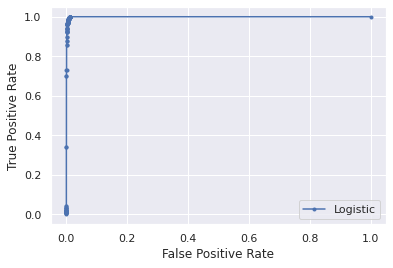

In [ ]:
lr_probsm = logreg_cvsm.predict_proba(X_test)
lr_probsm = lr_probsm[:, 1]


lr_auc = roc_auc_score(y_test, lr_probsm)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probsm)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
MAX_EVALS = 10

def objective(params):
    

    
    

    rfc = RandomForestClassifier(**params)
    scores = cross_val_score(rfc, X_train, y_train, cv=3, scoring='f1_macro')

    # Extract the best score
    best_score = max(scores)

    # Loss must be minimized
    loss = 1 - best_score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}


space = {
    
    'n_estimators': hp.choice('n_estimators',[200, 500]),
    'max_features': hp.choice('max_features',['auto','log2']),
    'max_depth': hp.choice('max_depth',[6,7,8]),
    'criterion': hp.choice('criterion',['gini', 'entropy']),

}


# Algorithm
tpe_algorithm = tpe.suggest

# Trials object to track progress
#bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest,max_evals = MAX_EVALS)

print(best)

100%|██████████| 10/10 [07:21<00:00, 44.14s/it, best loss: 0.00014316411048531652]
{'criterion': 1, 'max_depth': 1, 'max_features': 1, 'n_estimators': 1}


In [ ]:
rf_modelsm = RandomForestClassifier(criterion = 'entropy', max_depth = 7, max_features =  'log2', n_estimators = 500)

rf_modelsm.fit(X_train, y_train)

rf_predsm = rf_modelsm.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, rf_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, rf_predsm)))
print(confusion_matrix(y_test,rf_predsm))
print(classification_report(y_test, rf_predsm))

tpr = recall_score(y_test, rf_predsm)
tnr = recall_score(y_test, rf_predsm, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9993319229484467
Recall/Sensitivity 1.0
[[4470    6]
 [   0 4505]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4476
           1       1.00      1.00      1.00      4505

    accuracy                           1.00      8981
   macro avg       1.00      1.00      1.00      8981
weighted avg       1.00      1.00      1.00      8981

False Positive rate =0.001
True Positive Rate = 1.000
False Negative rate =0.000
True Negative Rate = 0.999


Random Forest: ROC AUC=1.000


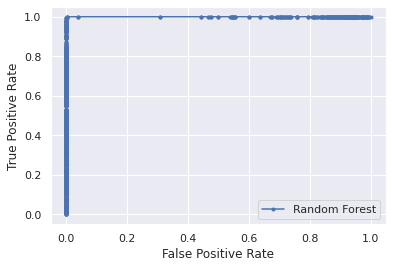

In [ ]:
rf_probsm = rf_modelsm.predict_proba(X_test)
rf_probsm = rf_probsm[:, 1]


rf_auc = roc_auc_score(y_test, rf_probsm)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probsm)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
MAX_EVALS = 10

def objective(params):
    

    # Perform n_fold cross validation with hyperparameters
    # Use early stopping and evaluate based on ROC AUC

    xgb = XGBClassifier(**params)
    scores = cross_val_score(xgb, X_train, y_train, cv=3, scoring='f1_macro')

    # Extract the best score
    best_score = max(scores)

    # Loss must be minimized
    loss = 1 - best_score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}


space = {
    
    #'learning_rate': hp.choice('learning_rate',[0.025, 0.15, 0.2]),
    'reg_alpha': hp.choice('reg_alpha',[1.1, 1.2, 1.3]),
    'max_depth': hp.choice('max_depth',[15,20,25]),
    'n_estimators': hp.choice('n_estimators',[400, 700, 1000]),
    #'subsample': hp.choice('subsample',[0.5, 0.95, 1.0]),
    
}


# Algorithm
tpe_algorithm = tpe.suggest

# Trials object to track progress
#bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest,max_evals = MAX_EVALS)

print(best)

100%|██████████| 10/10 [05:00<00:00, 30.03s/it, best loss: 0.00042949208497633506]
{'max_depth': 2, 'n_estimators': 1, 'reg_alpha': 0}


In [ ]:
xgbsm = XGBClassifier(max_depth=25,n_estimators=700,reg_alpha=1.1 )
xgbsm.fit(X_train, y_train)
xgb_predsm = xgbsm.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, xgb_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, xgb_predsm)))
print(confusion_matrix(y_test, xgb_predsm))
print(classification_report(y_test, xgb_predsm))

tpr = recall_score(y_test, xgb_predsm)
tnr = recall_score(y_test, xgb_predsm, pos_label = 0)
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.999109230597929
Recall/Sensitivity 1.0
[[4468    8]
 [   0 4505]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4476
           1       1.00      1.00      1.00      4505

    accuracy                           1.00      8981
   macro avg       1.00      1.00      1.00      8981
weighted avg       1.00      1.00      1.00      8981

False Positive rate =0.002
True Positive Rate = 1.000
False Negative rate =0.000
True Negative Rate = 0.998


XGBoost: ROC AUC=1.000


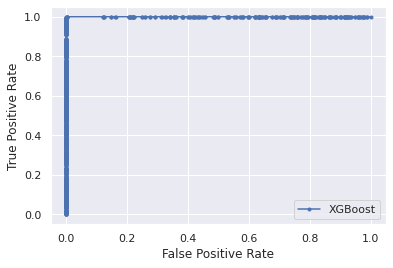

In [ ]:
xgb_probsm = xgbsm.predict_proba(X_test)
xgb_probsm = xgb_probsm[:, 1]


xgb_auc = roc_auc_score(y_test, xgb_probsm)
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probsm)
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
MAX_EVALS = 10

def objective(params):
    

    # Perform n_fold cross validation with hyperparameters
    # Use early stopping and evaluate based on ROC AUC

    gbc = GradientBoostingClassifier(**params)
    scores = cross_val_score(gbc, X_train, y_train, cv=3, scoring='f1_macro')

    # Extract the best score
    best_score = max(scores)

    # Loss must be minimized
    loss = 1 - best_score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}


space = {
    
    'n_estimators': hp.choice('n_estimators',[100,400,500]),
    'reg_alpha': hp.choice('reg_alpha',[1.1, 1.2, 1.3]),
    'max_depth': hp.choice('max_depth',[15,20,25]),
    'reg_lambda': hp.choice('reg_lambda',[1.1, 1.2, 1.3]),

}


# Algorithm
tpe_algorithm = tpe.suggest

# Trials object to track progress
#bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest,max_evals = MAX_EVALS)

print(best)

100%|██████████| 10/10 [00:24<00:00,  2.46s/it, best loss: 0.00028632832073627323]
{'max_depth': 2, 'n_estimators': 2, 'reg_alpha': 1, 'reg_lambda': 2}


In [ ]:
gbcsm = GradientBoostingClassifier(reg_alpha= 1.2, max_depth= 25, reg_lambda= 1.3, n_estimators= 500)
gbcsm.fit(X_train, y_train)
gbc_predsm = gbcsm.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, gbc_predsm)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, gbc_predsm)))
print(confusion_matrix(y_test, gbc_predsm))
print(classification_report(y_test, gbc_predsm))

tpr = recall_score(y_test, gbc_predsm)
tnr = recall_score(y_test, gbc_predsm, pos_label = 0)
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Accuracy 0.9993319229484467
Recall/Sensitivity 1.0
[[4470    6]
 [   0 4505]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4476
           1       1.00      1.00      1.00      4505

    accuracy                           1.00      8981
   macro avg       1.00      1.00      1.00      8981
weighted avg       1.00      1.00      1.00      8981

False Positive rate =0.001
True Positive Rate = 1.000
False Negative rate =0.000
True Negative Rate = 0.999


Gradient Boosting: ROC AUC=1.000


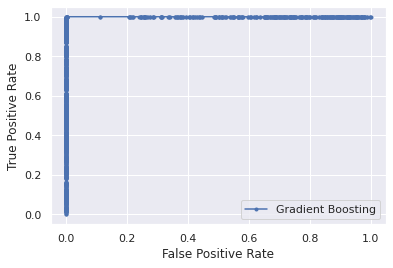

In [ ]:
gbc_probsm = gbcsm.predict_proba(X_test)
gbc_probsm = gbc_probsm[:, 1]


gbc_auc = roc_auc_score(y_test, gbc_probsm)
print('Gradient Boosting: ROC AUC=%.3f' % (gbc_auc))
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_probsm)
pyplot.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()